In [1]:
PRODUCT = "ABI"
DOMAIN = "F"

In [2]:
from goes2go import GOES

satellites = {
    "east": GOES(satellite=16, product=PRODUCT, domain=DOMAIN),
    "west": GOES(satellite=18, product=PRODUCT, domain=DOMAIN),
}

/Users/tanaynistala/Developer/Turbulence/.venv/lib/python3.13/site-packages/goes2go/data.py:665: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  within=pd.to_timedelta(config["nearesttime"].get("within", "1h")),
/Users/tanaynistala/Developer/Turbulence/.venv/lib/python3.13/site-packages/goes2go/NEW.py:188: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  within=pd.to_timedelta(config["nearesttime"].get("within", "1h")),


In [3]:
from cartopy import crs as ccrs

# Source: http://www.radicalcartography.net/?projectionref
projection = ccrs.AlbersEqualArea(
    central_longitude=-96,
    central_latitude=37.5,
    standard_parallels=(29.5, 45.5)
)

In [4]:
data = satellites["east"].nearesttime("2024-11-06 23:59:00")

 👮🏻‍♂️ File already exists. Do not overwrite: /Users/tanaynistala/data/noaa-goes16/ABI-L2-MCMIPF/2024/312/00/OR_ABI-L2-MCMIPF-M6_G16_s20243120000207_e20243120009515_c20243120009596.nc
📦 Finished downloading [1] files to [/Users/tanaynistala/data/noaa-goes16/ABI-L2-MCMIPF].
📚 Finished reading [1] files into xarray.Dataset.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [5]:
from matplotlib.pyplot import Axes
from netCDF4 import Dataset

def plot(ax: Axes, data: Dataset, key: str) -> Axes:
    from goes2go.tools import abi_crs
    crs, x, y = abi_crs(data, key)

    return ax.pcolormesh(x, y, data[key], transform=crs)

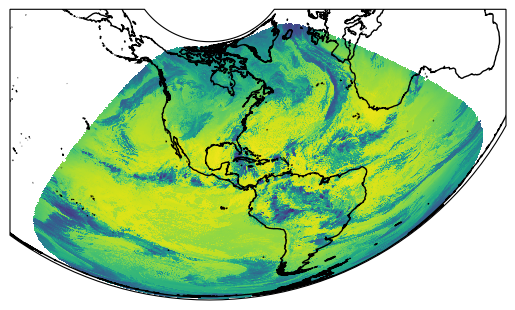

In [6]:
from matplotlib import pyplot as plt

ax = plt.axes(projection=projection)
ax.coastlines(resolution="50m")
plot(ax, data, "CMI_C13")

plt.show()